<a href="https://colab.research.google.com/github/TejashreePatil8951/DeepLearning/blob/main/Handwitten_Digit_Classificatiion_Poject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Handwritten Digit Classification Project**

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

Load MNIST datset

In [5]:
from keras.datasets import mnist
(xtrain, ytrain),(xtest, ytest) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [6]:
xtrain.shape

(60000, 28, 28)

In [7]:
xtrain

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [8]:
ytrain

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

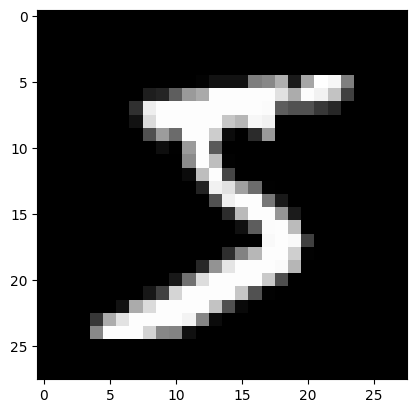

In [9]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[0], cmap='gray')

In [10]:
xtest.shape

(10000, 28, 28)

In [11]:
ytest

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

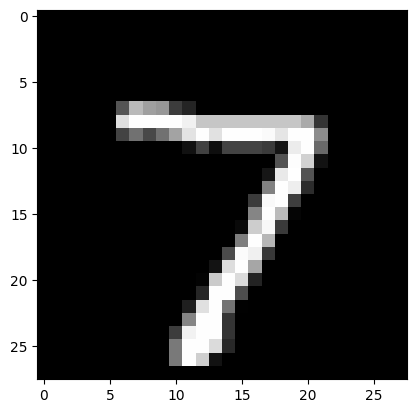

In [12]:
plt.imshow(xtest[0], cmap='gray')

Displaying first 9 images from train data

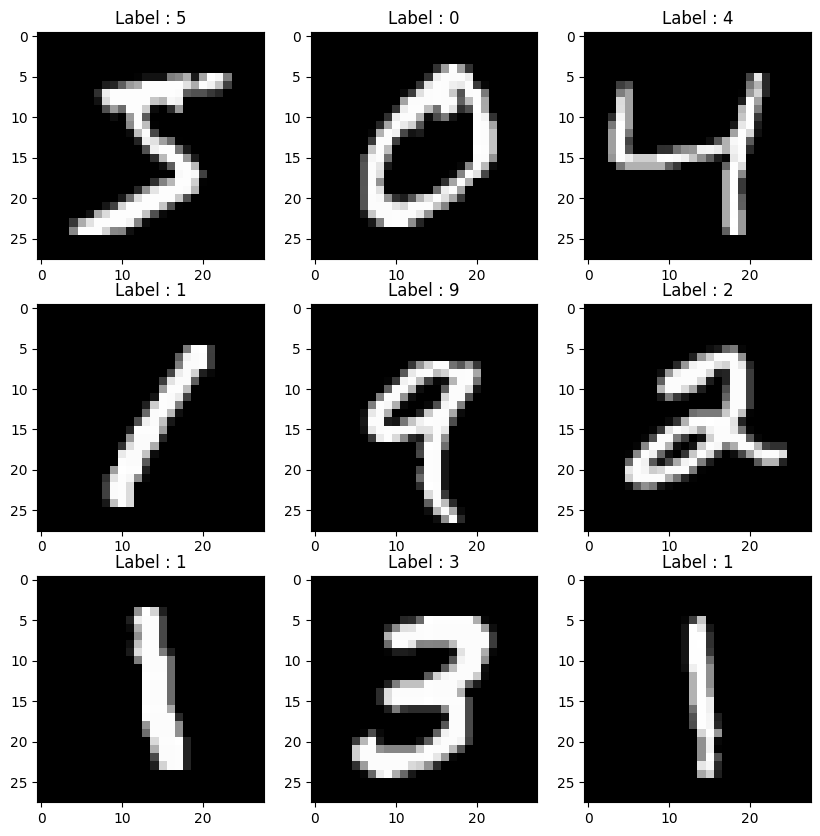

In [15]:
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(xtrain[i] , cmap='gray')
  plt.title(f"Label : {ytrain[i]}")

In [16]:
import numpy as np
np.unique(ytrain)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [17]:
len(np.unique(ytrain))

10

This is a multiclass classification problem

Preprocess image data

In [20]:
xtrain_scl= xtrain.astype("float32")/255
xtest_scl = xtest.astype("float32")/255

In [22]:
xtrain_scl[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Onehot encode the y features

In [23]:
from keras.utils import to_categorical
ytrain_cat = to_categorical(ytrain)
ytest_cat = to_categorical(ytest)


In [24]:
ytrain[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [25]:
ytrain_cat[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [26]:
ytest[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [28]:
ytest_cat[0:5]


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [29]:
xtrain.shape

(60000, 28, 28)


Build the neural network

In [30]:
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [31]:
model = Sequential()

# Added Input layer
model.add(Input(shape=(28, 28, 1)))

# Add Convolution Layer 1
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))

# Add Max pooling 1
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add Convolution Layer2
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

# Add Max pooling 2
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add Flatten Layer
model.add(Flatten())

# Add Dropout Layer
model.add(Dropout(0.5))

# Output layer
model.add(Dense(ytrain_cat.shape[1], activation='softmax'))

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [33]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [34]:
hist = model.fit(xtrain_scl, ytrain_cat, epochs=15, validation_split=0.1)

Epoch 1/15
1688/1688 [==============================] - 14s 5ms/step - loss: 0.2355 - accuracy: 0.9272 - val_loss: 0.0684 - val_accuracy: 0.9808
Epoch 2/15
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0873 - accuracy: 0.9729 - val_loss: 0.0451 - val_accuracy: 0.9868
Epoch 3/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0673 - accuracy: 0.9793 - val_loss: 0.0383 - val_accuracy: 0.9890
Epoch 4/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0558 - accuracy: 0.9824 - val_loss: 0.0335 - val_accuracy: 0.9898
Epoch 5/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0521 - accuracy: 0.9832 - val_loss: 0.0309 - val_accuracy: 0.9905
Epoch 6/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0451 - accuracy: 0.9857 - val_loss: 0.0308 - val_accuracy: 0.9913
Epoch 7/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0425 - accuracy: 0.9862 - val_loss: 0.0316 - val_accuracy


Plot the learning curve

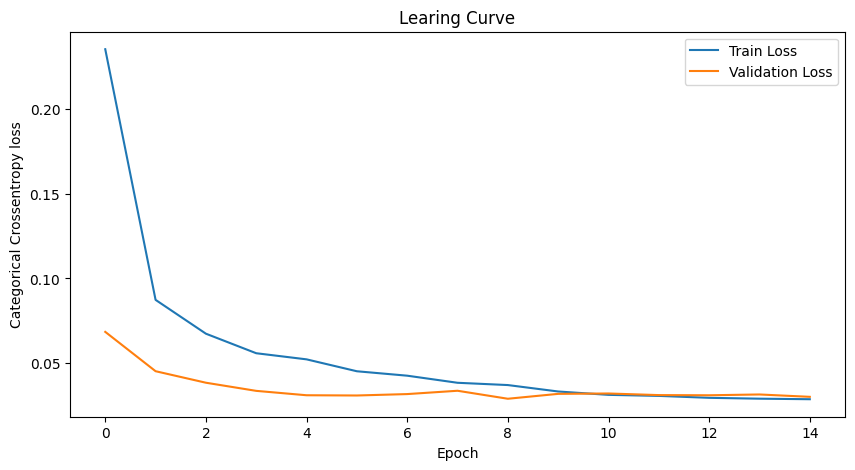

In [35]:
plt.figure(figsize=(10, 5))
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Learing Curve')
plt.ylabel('Categorical Crossentropy loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


Evaluate the model in train and test

In [36]:
model.evaluate(xtrain_scl, ytrain_cat)

1875/1875 [==============================] - 7s 4ms/step - loss: 0.0122 - accuracy: 0.9965


[0.012165950611233711, 0.9964666962623596]

In [37]:
model.evaluate(xtest_scl, ytest_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0247 - accuracy: 0.9922


[0.024702513590455055, 0.9922000169754028]

Predict results for train and test

In [38]:
yprob_train = model.predict(xtrain_scl)
yprob_test = model.predict(xtest_scl)

313/313 [==============================] - 1s 2ms/step


In [39]:
yprob_train[0:5]

array([[1.0877603e-11, 7.8491807e-10, 7.9199364e-10, 2.6560546e-04,
        1.7654213e-14, 9.9973387e-01, 9.0568010e-13, 8.4562792e-08,
        5.9860582e-08, 2.8306587e-07],
       [9.9999964e-01, 1.1484832e-16, 3.0396342e-07, 6.3340771e-13,
        1.9212406e-11, 5.8381170e-14, 5.8176561e-09, 7.9581917e-14,
        7.2990981e-11, 1.6977568e-08],
       [5.1525030e-16, 4.5865389e-07, 9.0813898e-11, 2.5633414e-11,
        9.9999881e-01, 1.7685303e-12, 1.1868233e-12, 5.6818942e-07,
        1.5495305e-09, 6.7812550e-08],
       [4.8281454e-08, 9.9984324e-01, 1.8472102e-06, 5.6268662e-10,
        1.3904263e-04, 1.0698874e-09, 4.6848410e-08, 1.3674546e-05,
        2.0596706e-06, 1.4933349e-08],
       [9.9779698e-12, 1.8952873e-09, 1.0744575e-09, 5.9924319e-09,
        1.0864702e-03, 4.1243334e-10, 2.3006521e-14, 1.1015852e-06,
        1.3044569e-05, 9.9889934e-01]], dtype=float32)

In [40]:
yprob_test[0:5]

array([[1.2475776e-09, 3.0512429e-11, 2.0003665e-06, 2.3177286e-07,
        1.3820392e-12, 1.6561528e-11, 2.2582436e-17, 9.9999404e-01,
        1.3618505e-09, 3.7414197e-06],
       [2.0215219e-07, 7.7203106e-07, 9.9999869e-01, 1.1116912e-09,
        2.8335017e-09, 9.0645485e-15, 3.1119899e-07, 1.0587345e-11,
        1.3808391e-08, 4.2504341e-13],
       [6.7263535e-08, 9.9986732e-01, 6.7179400e-07, 1.7404082e-08,
        1.2455552e-04, 1.8172312e-07, 1.7371855e-07, 6.1842634e-06,
        7.1276440e-07, 3.4050263e-08],
       [9.9998724e-01, 6.4354839e-14, 1.5107162e-06, 8.4886048e-10,
        7.6005966e-09, 4.4560404e-09, 1.0201220e-05, 1.5698477e-10,
        9.0611586e-08, 9.1205158e-07],
       [1.0349231e-10, 4.1833613e-13, 3.4681935e-10, 1.3965891e-13,
        9.9999988e-01, 5.6337777e-12, 2.8042084e-09, 8.5526863e-12,
        1.0755059e-09, 9.2779246e-08]], dtype=float32)

In [41]:
import numpy as np
ypred_train = np.argmax(yprob_train, axis=1)
ypred_test = np.argmax(yprob_test, axis=1)

In [42]:
ypred_train[0:5]

array([5, 0, 4, 1, 9])

In [43]:
ytrain[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [45]:
ypred_test[0:5]

array([7, 2, 1, 0, 4])

In [46]:
ytest[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)


Plot the confusion Matrix

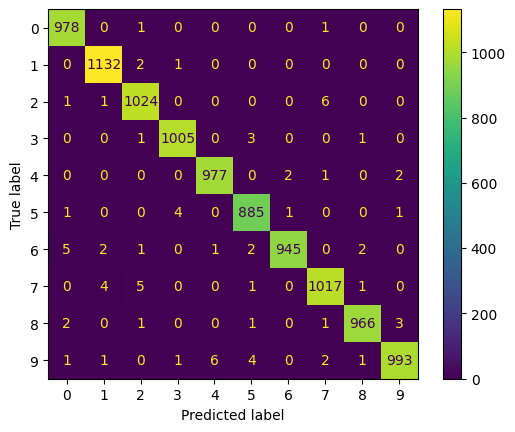

In [47]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(ytest, ypred_test)

In [48]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



**Save above model for future use**

In [49]:
model.save('digit_model.keras')


**Load above model**

In [50]:
from keras.models import load_model
nn = load_model('/content/digit_model.keras')
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0